### Quantum Battery project

Step 1. Run below cell to import all package.

In [1]:
from qsee.compilation.qsp import QuantumStatePreparation
from qsee.core import ansatz, state, gradient, optimizer
from qsee.backend import constant, utilities
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import os
import base.gradient
import base.object
import base.hamiltonian
import numpy as np, qiskit
import tqix as tq
import numpy as np
from scipy.signal import find_peaks
%load_ext autoreload
%autoreload 2

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


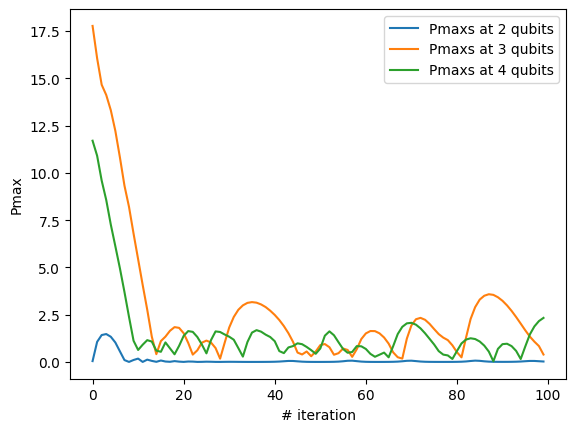

In [7]:

def grad_Pmax(num_qubits, tmax, thetas, h1):
    grad = np.zeros(len(thetas), dtype=np.complex128)
    for i in range(len(thetas)):
        Pi = base.hamiltonian.Pi(num_qubits, 'XX', i) + base.hamiltonian.Pi(num_qubits, 'YY', i)
        psi_t = base.object.psi_t(num_qubits, tmax, h1)
        h0 = base.hamiltonian.h0(num_qubits)
        grad[i] = 1j * tmax * (tq.daggx(psi_t) @ (Pi @ h0 - h0 @ Pi) @ psi_t)
    return grad
def find_Pmax(num_qubits, h1, t = 10, auto_stop = True):
    Ps = []
    ts = np.linspace(0, t, 100)
    for t in ts:
        P = base.object.P(num_qubits, t, h1)
        Ps.append(P)
        peaks, _ = find_peaks(Ps)
        if len(peaks) == 2 and auto_stop:
            break
    Pmax = np.max(Ps)
    tmax = ts[np.argmax(Ps)]
    return Pmax, tmax
for num_qubits in [2,3,4]:
    # num_qubits = 2
    thetas = np.random.uniform(0, 2*np.pi, num_qubits - 1)
    thetas = thetas.astype(np.complex128)
    Pmaxs = []
    tmaxs = []
    num_iteration = 100
    for i in range(0, num_iteration):
        h1 = base.hamiltonian.h1_xx(num_qubits, thetas)
        Pmax, tmax = find_Pmax(num_qubits, h1)
        Pmaxs.append(Pmax)
        tmaxs.append(tmax)
        # grad_C = -grad_Pmax
        grad_C = -grad_Pmax(num_qubits, tmax, thetas, h1)
        if i == 0:
            m, v1 = list(np.zeros(thetas.shape[0])), list(
                np.zeros(thetas.shape[0]))
        optimizer_params = [m, v1, i, grad_C]
        thetas = optimizer.adam(thetas, *optimizer_params)
    plt.plot(range(0, num_iteration), Pmaxs, label=f"Pmaxs at {num_qubits} qubits")
plt.xlabel("# iteration")
plt.ylabel("Pmax")
plt.legend()

<img src = './docs/1.png' height = '400px'>
<img src = './docs/2.png'  height = '400px'>